In [1]:
%load_ext autoreload
%autoreload 2
from tfr_evaluate import get_true_pred
from test_to_bw_fast import get_config
import glob
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from metrics import get_pearsonr_concatenated, get_pearsonr_per_seq

In [18]:
%load_ext autoreload
%autoreload 2
from tfr_evaluate import *
import metrics

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
collect_sweep_dirs("toneyan/BASENJI_BIN_LOSS/igxa7jb7")

['/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162932-56p3xy2p',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_163101-7qjhy0ff',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162940-pxy34wg8',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162941-e3f2p92u',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162937-r3jvc9kj']

In [15]:
run_dirs

['/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162932-56p3xy2p',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_163101-7qjhy0ff',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162940-pxy34wg8',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162941-e3f2p92u',
 '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210923_162937-r3jvc9kj']

In [2]:
run_dirs = collect_run_dirs('BASENJI_BIN_LOSS')

wandb: Currently logged in as: toneyan (use `wandb login --relogin` to force relogin)


In [4]:
testset, targets, target_dataset_idr = collect_datasets()

In [8]:
get_scaling_factors(all_true, all_pred)

array([1.7970057, 1.1871823, 1.0108575, 1.2598376, 2.0950527, 1.2199218,
       1.9918476, 1.1640174, 1.1705098, 2.057555 , 1.5521909, 1.4378747,
       1.0702202, 1.9019743, 1.8698908], dtype=float32)

In [10]:
for run_path in run_dirs:
    all_true, all_pred = get_true_pred(run_path, testset)
    scalings = get_scaling_factors(all_true, all_pred)
    print(run_path)
    print(scalings)

137it [00:53,  2.57it/s]


/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210922_044927-vjg876vg
[1.7970057 1.1871823 1.0108575 1.2598376 2.0950527 1.2199218 1.9918476
 1.1640174 1.1705098 2.057555  1.5521909 1.4378747 1.0702202 1.9019743
 1.8698908]


137it [00:52,  2.61it/s]


/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210922_044827-de61t72r
[1.6678479e-10 3.0374175e-10 2.0790963e-10 2.2678814e-10 2.3788538e-10
 2.0694974e-10 2.7316335e-10 1.9835764e-10 1.2996403e-10 3.2331207e-10
 3.0980629e-10 2.4327756e-10 1.6107767e-10 2.6431732e-10 3.2539155e-10]


137it [00:54,  2.54it/s]
/home/shush/profile/QuantPred/tfr_evaluate.py:73: RuntimeWarning: divide by zero encountered in true_divide
  scaling_factors =  truth_per_cell_line_sum / pred_per_cell_line_sum
/home/shush/profile/QuantPred/tfr_evaluate.py:73: RuntimeWarning: overflow encountered in true_divide
  scaling_factors =  truth_per_cell_line_sum / pred_per_cell_line_sum


/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210922_044820-usqrkfni
[          inf           inf           inf 3.0780605e+33 2.6122636e+24
           inf           inf 3.2201588e+16 2.2723781e+30           inf
           inf           inf 1.2172857e+21 2.1739199e+37           inf]


137it [00:51,  2.64it/s]


/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210922_044711-epw9in9m
[inf inf inf inf inf inf inf inf inf inf inf inf inf inf inf]


109it [00:41,  2.63it/s]


KeyboardInterrupt: 

In [44]:
bad_run = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210922_044820-usqrkfni'

all_true, all_pred = get_true_pred(bad_run, testset)


137it [00:56,  2.41it/s]


In [45]:
scaling_factors = get_scaling_factors(all_true, all_pred)

In [46]:
if (np.isfinite(scaling_factors)).sum() == len(scaling_factors): # if all factors are ok
    scaled_pred = all_pred * scaling_factors
    sets_to_process = {'raw': all_pred, 'scaled': scaled_pred}
else:
    sets_to_process = {'raw': all_pred}

In [47]:
process_run_list([bad_run], 'delthis.csv')

/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar/run-20210922_044820-usqrkfni


137it [00:58,  2.36it/s]


5it [00:04,  1.05it/s]


3it [00:02,  1.20it/s]


6it [00:05,  1.12it/s]


4it [00:04,  1.01s/it]


4it [00:04,  1.01s/it]


5it [00:04,  1.01it/s]


6it [00:05,  1.16it/s]


3it [00:02,  1.05it/s]


5it [00:04,  1.06it/s]


6it [00:05,  1.17it/s]


7it [00:05,  1.19it/s]


5it [00:04,  1.10it/s]


7it [00:05,  1.17it/s]


3it [00:04,  1.35s/it]


7it [00:06,  1.11it/s]


In [41]:
complete_performance

,mse,js_per_seq,js_conc,poiss,pr,targets,pred type,eval type
0,1.322566,0.299038,0.356764,1.0,NaN,GM21381,raw,whole
1,1.284779,0.329465,0.433103,1.0,NaN,GM23338,raw,whole
2,0.925134,0.299417,0.405867,1.0,NaN,HepG2,raw,whole
3,1.793783,0.426090,0.484801,1.0,NaN,RWPE2,raw,whole
4,1.758030,NaN,0.466150,1.0,NaN,HG03575,raw,whole
5,0.837404,0.260284,0.357158,1.0,NaN,K562,raw,whole
6,1.250274,0.485325,0.535467,1.0,NaN,DND-41,raw,whole
7,1.018060,NaN,0.392173,1.0,NaN,GM12878,raw,whole
8,0.872984,0.252494,0.349734,1.0,NaN,A549,raw,whole
9,1.426741,0.409022,0.468823,1.0,NaN,HCT116,raw,whole


In [53]:
run_dirs = ['/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar_2/run-20210906_173104-kx48qrtp']
res_dir = 'summary_metrics_tables' # output dir
# wandb_project_name = 'AUGMENTATION_BIN_SIZE' # project name in wandb
wandb_project_name = 'TEST'
csv_filename = wandb_project_name + '.csv'

result_path = os.path.join(res_dir, csv_filename)
testset, targets, target_dataset_idr = collect_datasets()
if len(run_dirs) == 0:
    run_dirs = collect_run_dirs(wandb_project_name)
process_run_list(run_dirs, result_path)

137it [00:54,  2.51it/s]


5it [00:02,  2.11it/s]


3it [00:01,  1.97it/s]


6it [00:02,  2.27it/s]


4it [00:02,  1.82it/s]


4it [00:02,  1.80it/s]


5it [00:02,  1.89it/s]


6it [00:02,  2.20it/s]


3it [00:01,  1.76it/s]


5it [00:02,  1.99it/s]


6it [00:02,  2.10it/s]


7it [00:02,  2.37it/s]


5it [00:02,  1.98it/s]


7it [00:02,  2.39it/s]


3it [00:01,  1.68it/s]


7it [00:03,  2.26it/s]


In [9]:
run_path = 'basenji_best_128'

In [55]:
data_dir = '/home/shush/profile/QuantPred/datasets/chr8/complete/random_chop/i_2048_w_1/'
sts = util.load_stats(data_dir)
testset = util.make_dataset(data_dir, 'test', sts, batch_size=512, shuffle=False)
targets = pd.read_csv(data_dir+'targets.txt', sep='\t')['identifier'].values
print(targets)

['GM21381' 'GM23338' 'HepG2' 'RWPE2' 'HG03575' 'K562' 'DND-41' 'GM12878'
 'A549' 'HCT116' 'IMR-90' 'NCI-H929' 'Panc1' 'PC-3' 'MCF']


In [12]:
all_truth, all_pred = get_true_pred(run_path, testset)

137it [00:55,  2.48it/s]


In [13]:
scaling_factors = get_scaling_factors(all_truth, all_pred)

In [542]:
run_path = '/mnt/31dac31c-c4e2-4704-97bd-0788af37c5eb/shush/wandb/wandb_elzar_2/run-20210905_204925-27nmtpjk'

In [370]:
bin_size_orig = get_config(run_path)['bin_size']['value']
bin_size_orig

32

In [371]:
cl_datasets = glob.glob('/home/shush/profile/QuantPred/datasets/cell_line_specific_test_sets/cell_line_0/complete/peak_centered/i_2048_w_1/')
data_dir = cl_datasets[0]
sts = util.load_stats(data_dir)
testset_8 = util.make_dataset(data_dir, 'test', sts, batch_size=512, shuffle=False)
targets = pd.read_csv(data_dir+'targets.txt', sep='\t')['identifier'].values
print(targets)

['GM21381']


In [372]:
truth, pred = get_true_pred(run_path, testset_8)


5it [00:00,  5.58it/s]


In [373]:
N, L, C  = truth.shape
eval_bin = 32
binned_truth = truth.reshape(N, eval_bin//bin_size_orig, 2048//eval_bin, C).mean(axis=1)
N, L, C  = pred.shape
binned_pred = pred.reshape(N, eval_bin//bin_size_orig, 2048//eval_bin, C).mean(axis=1)

In [374]:
i = int(data_dir.split('cell_line_')[-1].split('/complete')[0])

In [375]:
pred_i = np.expand_dims(binned_pred[:,:,i], axis=-1)

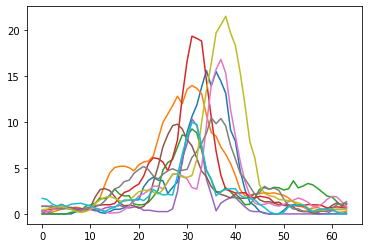

In [376]:
plt.plot(binned_truth[:10,:,0].T);

In [377]:
avg_per_seq = np_pr_per_seq(binned_truth, pred_i)
print('Per sequence average pearson r for IDRs of cell line 8 = ', avg_per_seq[0])

Per sequence average pearson r for IDRs of cell line 8 =  0.8022013187236737


In [378]:
conc_pr = np_pr_concatenated(binned_truth, pred_i)
print('Concatenated pearson r = for IDRs of cell line 8 =', conc_pr[0])

Concatenated pearson r = for IDRs of cell line 8 = 0.6789734088825553


# peak centered test set

In [379]:
peak_centered_test = '/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shush/peak_centered_test/i_2048_w_1/'

In [380]:
sts = util.load_stats(peak_centered_test)
peak_centered_testset = util.make_dataset(peak_centered_test, 'test', sts, batch_size=512, shuffle=False)
targets = pd.read_csv(peak_centered_test+'targets.txt', sep='\t')['identifier'].values

In [381]:
truth_pc, pred_pc = get_true_pred(run_path, peak_centered_testset)

24it [00:08,  2.74it/s]


In [382]:
truth_i = np.expand_dims(truth_pc[:,:,i], axis=-1)
pred_i = np.expand_dims(pred_pc[:,:,i], axis=-1)

In [383]:
truth_i.shape

(12054, 64, 1)

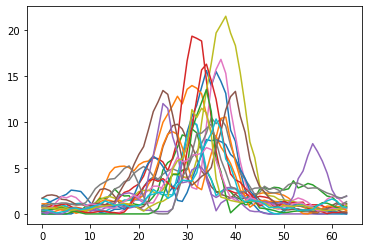

In [384]:
plt.plot(truth[:20,:,0].T);

In [385]:
per_seq_pr_pc = np_pr_per_seq(truth_i, pred_i)
print('Per sequence average pearson r for peak centered cell line 8 = ', per_seq_pr_pc[0])

/home/shush/tf_2/lib/python3.7/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Per sequence average pearson r for peak centered cell line 8 =  0.49649695349413503


In [386]:
conc_pr_pc = np_pr_concatenated(truth_i, pred_i)
print('Concatenated pearson r for peak centered cell line 8 = ', conc_pr_pc[0])

Concatenated pearson r for peak centered cell line 8 =  0.622545373464416


In [387]:
np_pr_per_seq(truth_i, pred_i)

[0.49649695349413503]

In [388]:
np_pr_concatenated(truth_i, pred_i)

[0.622545373464416]

# 6K per cell line IDR input, per chunk pearson r

In [8]:
cl_datasets = glob.glob('/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shush/15_IDR_test_sets_6K/cell_line_0/i_6144_w_1/')
data_dir = cl_datasets[0]
sts = util.load_stats(data_dir)
testset_6K = util.make_dataset(data_dir, 'test', sts, batch_size=512, shuffle=False)
targets = pd.read_csv(data_dir+'targets.txt', sep='\t')['identifier'].values
i = int(data_dir.split('cell_line_')[-1].split('/')[0])
print(targets)

['GM21381']


In [12]:
testset_2K = testset_6K.map(lambda x,y: (split_into_2k_chunks(x), split_into_2k_chunks(y)))



In [34]:
idr_df = evaluate_run_idr(run_path, {(i, targets[0]):testset_2K}, scaling_factors)

4it [00:01,  2.01it/s]


In [35]:
config = get_config(run_path)
relevant_config = {k:[config[k]['value']] for k in config.keys() if k not in ['wandb_version', '_wandb']}

In [36]:
pd.concat([idr_df, pd.DataFrame(relevant_config)], axis=1)

,mse,js_per_seq,js_conc,poiss,pr,targets,pred type,eval type,add_dropout,bin_size,data_dir,epochN,filtN_1,filtN_2,filtN_4,filtN_5,l_rate,loss_fn,model_fn,window_size
0,3.138485,0.261024,0.282450,0.067159,0.784579,GM21381,raw,idr,False,128,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
0,4.505164,0.149448,0.188959,-0.580713,0.784579,GM21381,scaled,idr,False,128,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048


In [21]:
target_dataset = extract_datasets()

In [22]:
df = evaluate_run_whole_idr(run_path, testset,targets, target_dataset)



137it [00:53,  2.56it/s]


5it [00:02,  2.26it/s]


3it [00:01,  2.22it/s]


6it [00:02,  2.44it/s]


4it [00:02,  2.00it/s]


4it [00:02,  1.93it/s]


5it [00:02,  2.18it/s]


6it [00:02,  2.41it/s]


3it [00:01,  1.87it/s]


5it [00:03,  1.65it/s]


6it [00:02,  2.29it/s]


7it [00:02,  2.60it/s]


5it [00:02,  2.10it/s]


7it [00:02,  2.44it/s]


3it [00:01,  1.71it/s]


7it [00:03,  2.29it/s]


In [18]:
truth, all_pred = get_true_pred(run_path, target_dataset[('14', 'MCF')])

5it [00:02,  2.16it/s]


In [23]:
df

,index,mse,js_per_seq,js_conc,poiss,pr,targets,pred type,eval type,0,...,2,3,4,5,6,7,8,9,10,11
0,0,0.507141,0.228383,0.268156,0.755236,0.601824,GM21381,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
1,1,0.496757,0.215701,0.280730,0.791044,0.694031,GM23338,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
2,2,0.377824,0.204101,0.263656,0.841401,0.661475,HepG2,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
3,3,0.843394,0.330217,0.354044,0.772139,0.620752,RWPE2,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
4,4,0.845184,0.360112,0.381869,0.736651,0.473902,HG03575,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
5,5,0.289988,0.178143,0.244383,0.832707,0.673132,K562,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
6,6,0.659688,0.403396,0.427876,0.861363,0.570803,DND-41,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
7,7,0.436881,0.194736,0.272982,0.835927,0.631666,GM12878,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
8,8,0.269623,0.172375,0.224574,0.813728,0.711450,A549,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048
9,9,0.617555,0.321039,0.350837,0.805368,0.654856,HCT116,raw,whole,False,...,/mnt/1a18a49e-9a31-4dbf-accd-3fb8abbfab2d/shus...,30,128,256,256,256,0.001,log_poisson,basenjimod,2048


In [19]:
np.expand_dims(all_pred[:,:,i], axis=-1)

array([[[1.7306669 ],
        [3.7424598 ],
        [7.3275366 ],
        ...,
        [0.6250138 ],
        [0.57313526],
        [0.44196734]],

       [[0.28243205],
        [0.51076466],
        [0.76087284],
        ...,
        [0.7779578 ],
        [0.5777492 ],
        [0.3990924 ]],

       [[0.517248  ],
        [0.47020078],
        [0.37353486],
        ...,
        [0.4856677 ],
        [0.72867775],
        [0.71270925]],

       ...,

       [[0.5504307 ],
        [0.50039935],
        [0.5683051 ],
        ...,
        [0.33759138],
        [0.30725056],
        [0.33233356]],

       [[0.71542734],
        [0.78273517],
        [1.0528681 ],
        ...,
        [0.8466827 ],
        [0.72920865],
        [0.69668955]],

       [[0.76306397],
        [0.7986942 ],
        [0.7152365 ],
        ...,
        [0.5430992 ],
        [0.4751027 ],
        [0.41024312]]], dtype=float32)